In [25]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import matplotlib.cm as cm
from matplotlib.patches import Patch
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy.stats import norm
import importlib
import basicfunc as bf
import matplotlib.colors as clrs
import seaborn as sns

importlib.reload(bf)

<module 'basicfunc' from 'c:\\Users\\Utente\\Desktop\\advancedLAB\\basicfunc.py'>

f_cut: 5128.409 ± 80.382
Chi² = 0.0471
Chi² ridotto = 0.0043


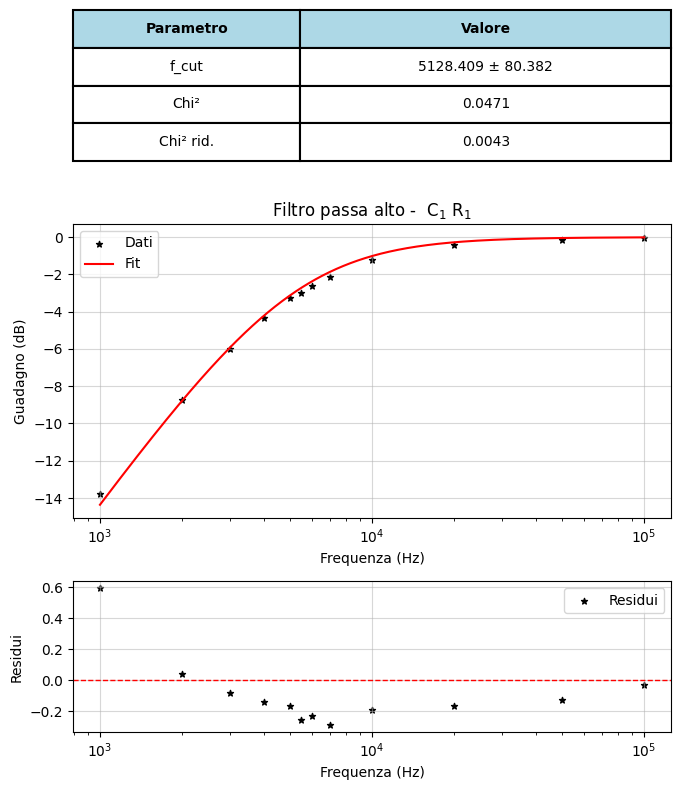

In [26]:
altoR1C1 = bf.bode("r1c1.txt", tipo="alto", titolo=r'Filtro passa alto -  C$_1$ R$_1$', plot=True)

A = 1.9781988638507588 ± 0.01524475899866004
tau = 932.0520752208565 ± 20.01519741706406
f0 = 0.009017923432855308 ± 0.014217590702069188
Chi-squared = 0.0020070084073988206
Reduced chi-squared = 0.00040140168147976413


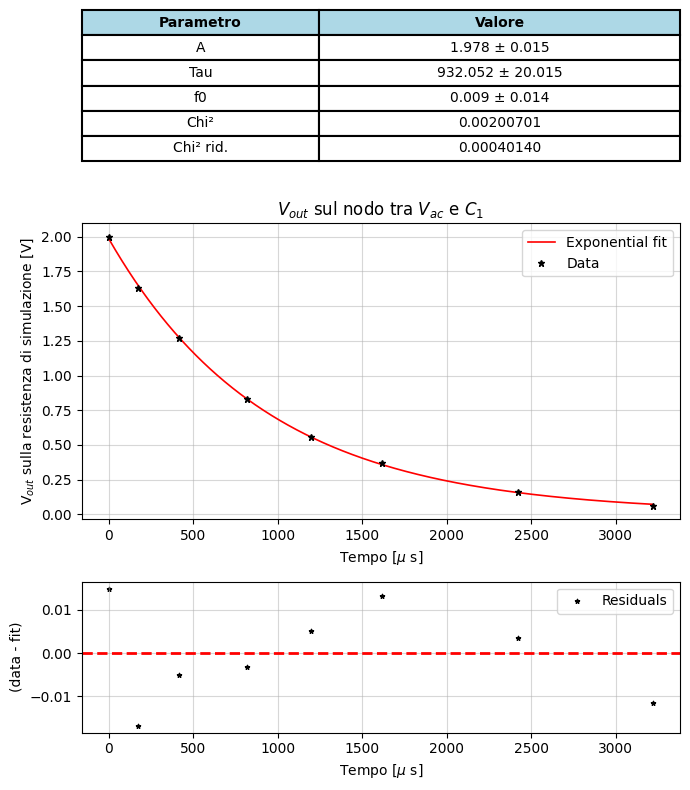

In [27]:
tempi = np.array([1, 176, 416, 816, 1200, 1620, 2420, 3220]) #microsecondi
vout_Rsimulaz = np.array([2.00, 1.63, 1.27, 0.83, 0.56, 0.37, 0.16, 0.06]) #volt

caduta_Rsimulazione = bf.exponential(tempi, vout_Rsimulaz, xlabel=r'Tempo [$\mu$ s]', ylabel=r'V$_{out}$ sulla resistenza di simulazione [V]', titolo=r'$V_{out}$ sul nodo tra $V_{ac}$ e $C_1$', plot=True)

f_cut: 1801.570 ± 37.670
Chi² = 0.0643
Chi² ridotto = 0.0058


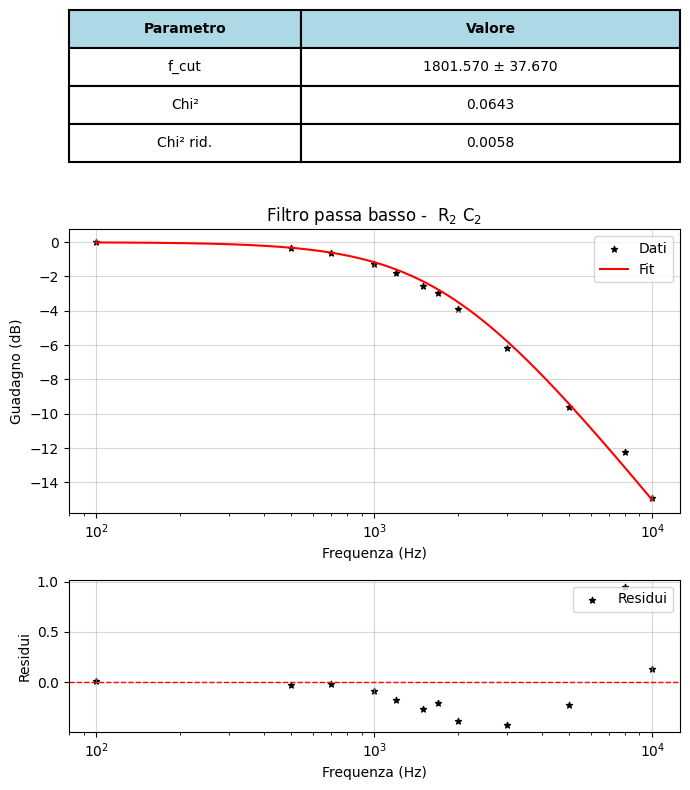

In [28]:
bassoR2C2 = bf.bode("r2c2.txt", tipo="basso", titolo=r'Filtro passa basso -  R$_2$ C$_2$', plot=True)